<a href="https://colab.research.google.com/github/oansari03/DS-Unit-2-Linear-Models/blob/master/Unit-2_Sprint-1.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BloomTech Data Science - Unit 2 Sprint 1 Module 1

In [ ]:
# Importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [ ]:
import sys

if 'google.colab' in sys.modules:
  # If you're on Colab:
  DATA_PATH = 'https://raw.githubusercontent.com/bloominstituteoftechnology/DS-Unit-2-Linear-Models/master/data/'
else:
  # If you're working locally:
  DATA_PATH = '..../data/'

# I. Wrangle Data

In [ ]:
df = pd.read_csv(DATA_PATH + 'condos/tribeca.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NEIGHBORHOOD             90 non-null     object 
 1   BUILDING_CLASS_CATEGORY  90 non-null     object 
 2   ADDRESS                  90 non-null     object 
 3   APARTMENT_NUMBER         90 non-null     object 
 4   ZIP_CODE                 90 non-null     float64
 5   GROSS_SQUARE_FEET        90 non-null     float64
 6   YEAR_BUILT               90 non-null     float64
 7   SALE_PRICE               90 non-null     int64  
 8   SALE_DATE                90 non-null     object 
dtypes: float64(3), int64(1), object(5)
memory usage: 6.5+ KB


In [ ]:
df.head()

,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE,SALE_DATE
0,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"181 HUDSON STREET, 6D",6D,10013.0,1840.0,1909.0,2800000,2019-01-03
1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"10 LITTLE WEST STREET, 19A",19A,10004.0,1759.0,0.0,2650000,2019-01-07
2,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"30 LITTLE WEST STREET, 7G",7G,10004.0,1190.0,2005.0,1005000,2019-01-09
3,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"2 RIVER TERRACE, 4C",4C,0.0,1088.0,2006.0,1678000,2019-01-10
4,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"380 RECTOR PLACE, 10A",10A,10280.0,873.0,0.0,1380000,2019-01-11


In [ ]:
df['NEIGHBORHOOD'].value_counts()

TRIBECA    90
Name: NEIGHBORHOOD, dtype: int64

In [ ]:
# Wrangle function to Clean up data

def wrangle(filepath):
   # Load the csv file, convert the date column to a datetime object and set it as index.
  df = pd.read_csv(filepath,
                   parse_dates=['SALE_DATE'],
                   index_col=['SALE_DATE'],
                   na_values=[0.0])

  #drop constant columns
  df.drop(columns=['BUILDING_CLASS_CATEGORY','NEIGHBORHOOD'], inplace=True)

  #Drop high-cardinality categorical columns (HCCC's)
  df.drop(columns=['APARTMENT_NUMBER','ADDRESS'], inplace=True)

  return df

df = wrangle(DATA_PATH + 'condos/tribeca.csv') 



In [ ]:
df.head()

,ZIP_CODE,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE
SALE_DATE,,,,
2019-01-03,10013.0,1840.0,1909.0,2800000
2019-01-07,10004.0,1759.0,NaN,2650000
2019-01-09,10004.0,1190.0,2005.0,1005000
2019-01-10,NaN,1088.0,2006.0,1678000
2019-01-11,10280.0,873.0,NaN,1380000


# II. Split Data

Split our dataset into a **feature matrix `X`** and a **target vector `y`**.

In [ ]:
# Split into feature matrix X and target vector y

X = df[['GROSS_SQUARE_FEET']] #2D # double brackets # DataFrame
y = df['SALE_PRICE'] #1D #Series

In [ ]:
X.head()

,GROSS_SQUARE_FEET
SALE_DATE,
2019-01-03,1840.0
2019-01-07,1759.0
2019-01-09,1190.0
2019-01-10,1088.0
2019-01-11,873.0


In [ ]:
y.head()

SALE_DATE
2019-01-03    2800000
2019-01-07    2650000
2019-01-09    1005000
2019-01-10    1678000
2019-01-11    1380000
Name: SALE_PRICE, dtype: int64

# III. Establish Baseline

If you had a *naïve model* that could only predict one value, how well would you model perform?

In [ ]:
y.mean() #baseline = mean of target

3928736.3666666667

In [ ]:
y_pred = [y.mean()] * len(y)

In [ ]:
print('baseline MAE', mean_absolute_error(y,y_pred))

baseline MAE 2783380.1977777784


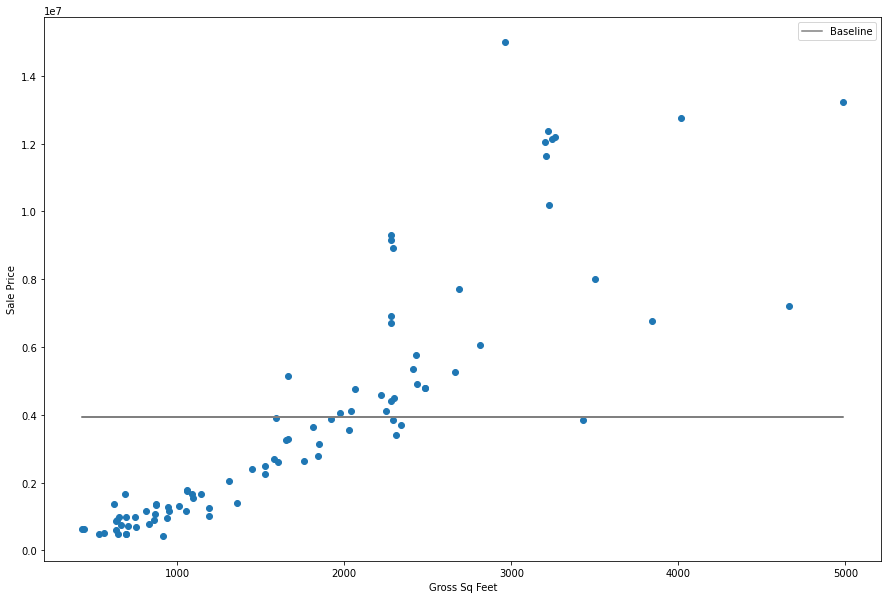

In [ ]:
# # Scatter plot to visualize the baseline
plt.figure(figsize=(15, 10))
plt.scatter(X, y)
plt.plot(X, y_pred, label='Baseline', color='grey')
plt.xlabel('Gross Sq Feet')
plt.ylabel('Sale Price')
plt.legend();

In [ ]:
# price = (m * sqft) + b

# IV. Build Model

In [ ]:
# step 1: import predictor class
# Look Above

#step 2:Instantiate my predictor
model_lr = LinearRegression()

# Step 3: fit my model
model_lr.fit(X,y)

# step 4: make predictions
y_pred_lr = model_lr.predict(X)

LinearRegression()

In [ ]:
y_pred_lr[:10]

array([4155299.64511241, 3906107.38502347, 2155608.66909006,
       1841811.00823732, 1180374.76232224, 5505860.16584135,
        632767.07965766, 2952408.61184358, 5505860.16584135,
       8422332.54317857])

# V. Check Metrics

In [ ]:
#MAE of LinearRegression model
print('Linear Regression MAE', mean_absolute_error(y,y_pred_lr))

Linear Regression MAE 1176817.9930150746


# VI. Communicate Results

Plot model

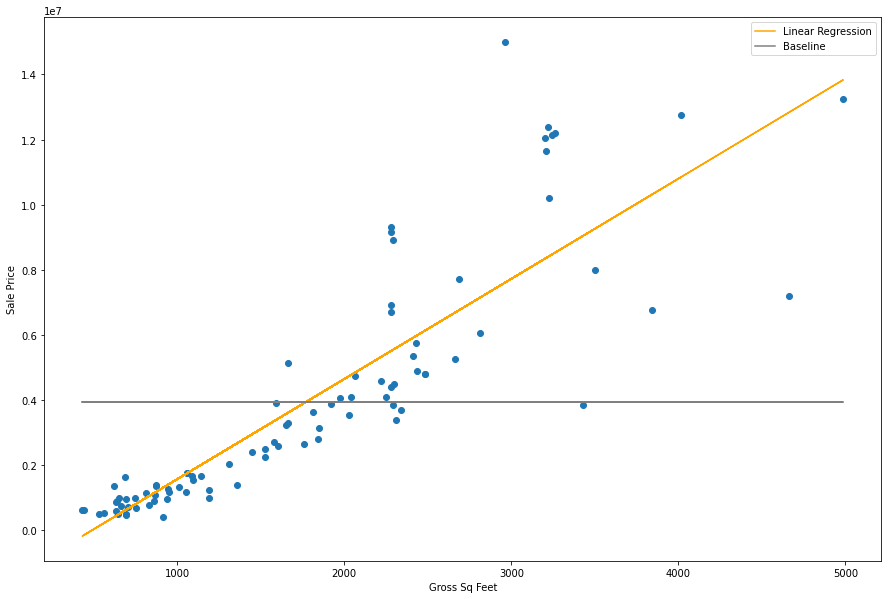

In [ ]:

plt.figure(figsize=(15, 10))
plt.scatter(X, y)
plt.plot(X,y_pred_lr, label='Linear Regression', color='orange')
plt.plot(X, y_pred, label='Baseline', color='grey')
plt.xlabel('Gross Sq Feet')
plt.ylabel('Sale Price')
plt.legend();

What are our beta coefficients?

In [ ]:
# price = (m * sqft) + b

In [ ]:
y_intercept = model_lr.intercept_
slope_coef = model_lr.coef_[0]

In [ ]:
y_intercept # y_intercept or beta_0

-1505364.0408585514

In [ ]:
 # .coef_ will give you an array. To just get the coefficient of our feature, provide the position index as argument (eg: [0])

In [ ]:
slope_coef

array([3076.44765542])

In [ ]:
slope_coef

3076.4476554190023

In [ ]:
# final equation
print(f'price = {y_intercept} + {slope_coef}*sqrt')

price = -1505364.0408585514 + 3076.4476554190023*sqrt
